In [90]:
from src.smth2matrix.shift2zero import shift2zero
import numpy as np
from math import ceil, floor

def line(p1, p2):
    A = (p1[1] - p2[1])
    B = (p2[0] - p1[0])
    C = (p1[0]*p2[1] - p2[0]*p1[1])
    return A, B, -C

def intersection(points1, points2):
    L1 = line(points1[0], points1[1])
    L2 = line(points2[0], points2[1])
    D  = L1[0] * L2[1] - L1[1] * L2[0]
    Dx = L1[2] * L2[1] - L1[1] * L2[2]
    Dy = L1[0] * L2[2] - L1[2] * L2[0]
    if D != 0:
        x = Dx / D
        y = Dy / D
        return x,y
    else:
        return False

In [91]:
h = 1
points = np.array([[0.3, 3], [1, 0], [2.1, 0], [3, 3.7]])

size_of_sides = shift2zero(points)
n_x = ceil(size_of_sides[0] / h)
n_y = ceil(size_of_sides[1] / h)

lines = []
for _ in range(n_y+1):
    lines.append([])
print(lines)

[[], [], [], [], []]


In [92]:
for k in range(0, n_y+1):
    start = None
    end = None
    for i0 in range(points.shape[0]):
        if i0 == points.shape[0]-1:
            i1 = 0
        else:
            i1 = (i0 + 1)
        if i0 == 0:
            i2 = points.shape[0]-1
        else:
            i2 = (i0 - 1)

        #вершина лежит на линии
        if points[i0][1] == k*h:
            if points[i2][1] < k*h and points[i1][1] < k*h:
                lines[k].append([points[i0][0], points[i0][0]])
            elif points[i2][1] > k*h and points[i1][1] > k*h:
                lines[k].append([points[i0][0], points[i0][0]])
            else:
                if start is None:
                    start = points[i0][0]
                else:
                    end = points[i0][0]
        #ребро пересекает линию
        elif points[i0][1] < k*h < points[i1][1] or points[i1][1] < k*h < points[i0][1]:
            if start is None:
                start = intersection([points[i0], points[i1]], [[0, k*h], [n_x, k*h]])[0]
            else:
                end = intersection([points[i0], points[i1]], [[0, k*h], [n_x, k*h]])[0]
        if start is not None and end is not None:
            lines[k].append([start, end])
            start = None
            end = None


        #extension algorithm
        if k*(h + 1) > points[i0][1] > k*h >= points[i1][1] and points[i2][1] <= k*h:
            lines[k+1].append([points[i0][0], points[i0][0]])
        elif points[i1][1] >= k*h > points[i0][1] > k*(h+1) and points[i2][1] >= k*h:
            lines[k+1].append([points[i0][0], points[i0][0]])

print(lines)

[[[0.7, 1.8]], [[0.46666666666666656, 2.043243243243243]], [[0.23333333333333328, 2.2864864864864862]], [[0.0, 2.5297297297297296]], [[2.7, 2.7]]]


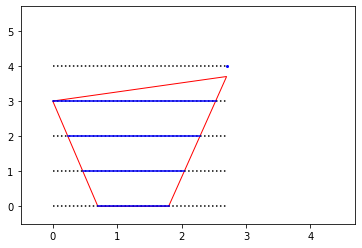

In [93]:

from matplotlib import pyplot as plt, patches

pallet_width = size_of_sides[0]
pallet_height = size_of_sides[1]

fig, ax = plt.subplots()

ax.set_xlim(-0.5, pallet_width + 2)
ax.set_ylim(-0.5, pallet_height + 2)

for i in range(len(lines)):
    plt.plot([0, pallet_width], [i*h, i*h], color = 'black', linestyle=':')

figure = patches.Polygon(points,
                            linewidth=1,
                            edgecolor='red',
                            fill=False)
ax.add_patch(figure)

for i in range(len(lines)):
    for sigment in lines[i]:
        if sigment[0] != sigment[1]:
            plt.plot(sigment, [i*h, i*h], color = 'blue')
        else:
            ax.scatter(sigment[0], i*h, color = 'blue', s = 4)

plt.savefig('sigments.png')